In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis
from scipy import stats


In [2]:
# Load dataset
file_path = "house_price.csv"
df = pd.read_csv(file_path)


In [3]:
# Display basic info and first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   

In [4]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [5]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


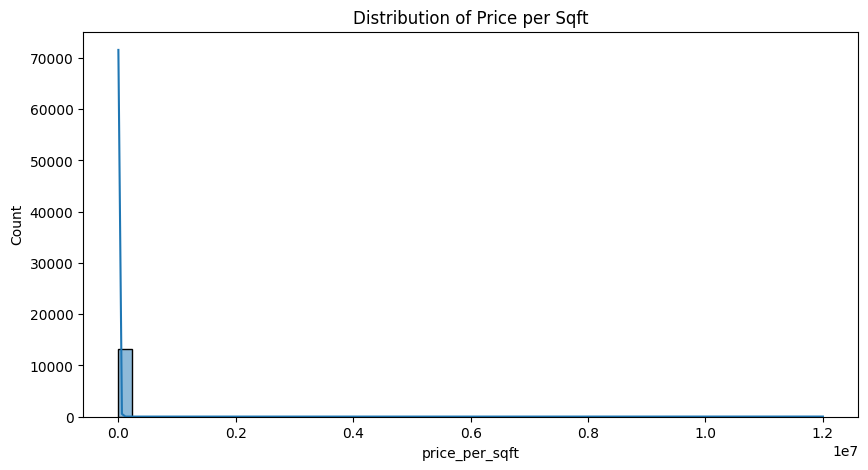

In [6]:
# Visualizing distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.title("Distribution of Price per Sqft")
plt.show()


In [7]:
# Outlier Detection and Removal Methods

In [8]:
def remove_outliers_zscore(data, column, threshold=3):
    z_scores = zscore(data[column])
    return data[np.abs(z_scores) < threshold]


In [9]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [10]:
def remove_outliers_percentile(data, column, lower=1, upper=99):
    lower_bound = np.percentile(data[column], lower)
    upper_bound = np.percentile(data[column], upper)
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [11]:
def remove_outliers_std(data, column, num_std=3):
    mean = data[column].mean()
    std = data[column].std()
    lower_bound = mean - num_std * std
    upper_bound = mean + num_std * std
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [12]:
# Apply outlier removal methods
df_zscore = remove_outliers_zscore(df, 'price_per_sqft')
df_iqr = remove_outliers_iqr(df, 'price_per_sqft')
df_percentile = remove_outliers_percentile(df, 'price_per_sqft')
df_std = remove_outliers_std(df, 'price_per_sqft')


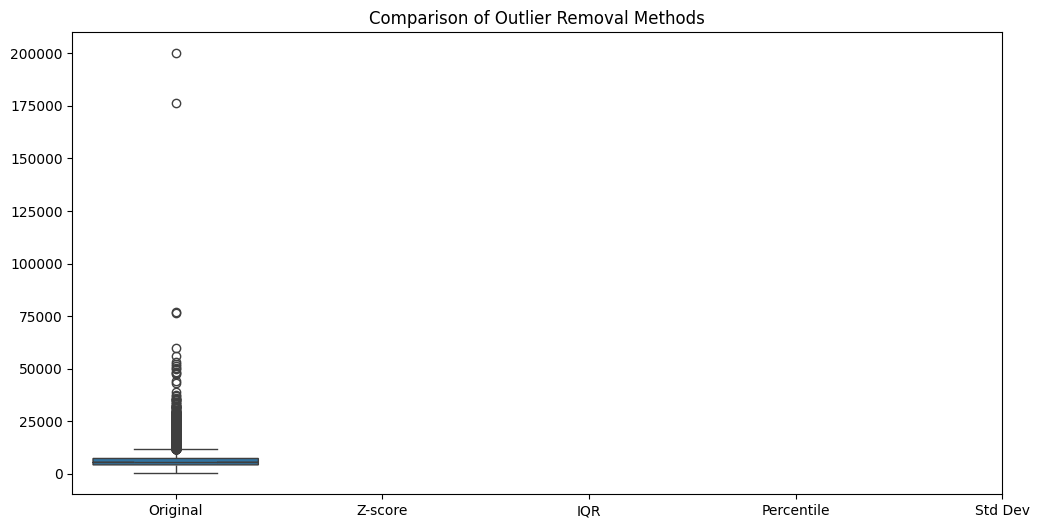

In [13]:
# Compare using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df['price_per_sqft'], df_zscore['price_per_sqft'], df_iqr['price_per_sqft'], 
                  df_percentile['price_per_sqft'], df_std['price_per_sqft']],
            notch=True)
plt.xticks([0, 1, 2, 3, 4], ["Original", "Z-score", "IQR", "Percentile", "Std Dev"])
plt.title("Comparison of Outlier Removal Methods")
plt.show()


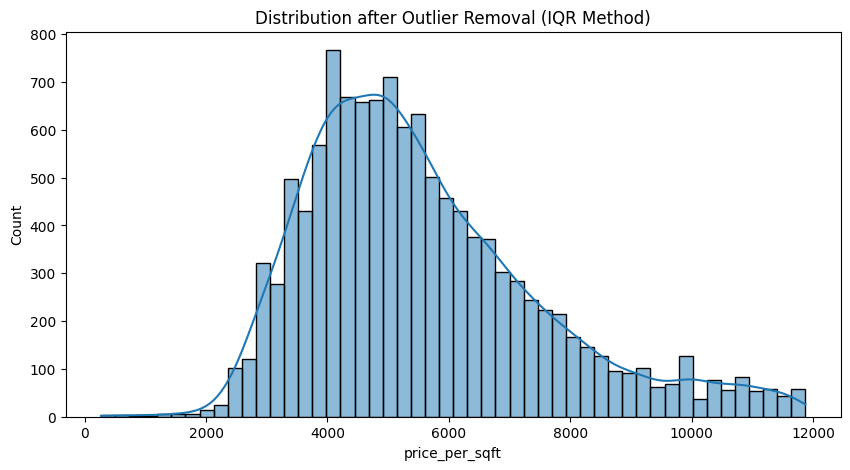

In [14]:
# Check normality using histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_iqr['price_per_sqft'], bins=50, kde=True)
plt.title("Distribution after Outlier Removal (IQR Method)")
plt.show()


In [15]:
# Skewness and Kurtosis
print("Before Transformation:")
print("Skewness:", skew(df['price_per_sqft']))
print("Kurtosis:", kurtosis(df['price_per_sqft']))


Before Transformation:
Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


In [16]:
# Apply log transformation
transformed_col = np.log1p(df_iqr['price_per_sqft'])
print("After Log Transformation:")
print("Skewness:", skew(transformed_col))
print("Kurtosis:", kurtosis(transformed_col))


After Log Transformation:
Skewness: -0.12988210833124453
Kurtosis: 1.3369230684904956


In [19]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

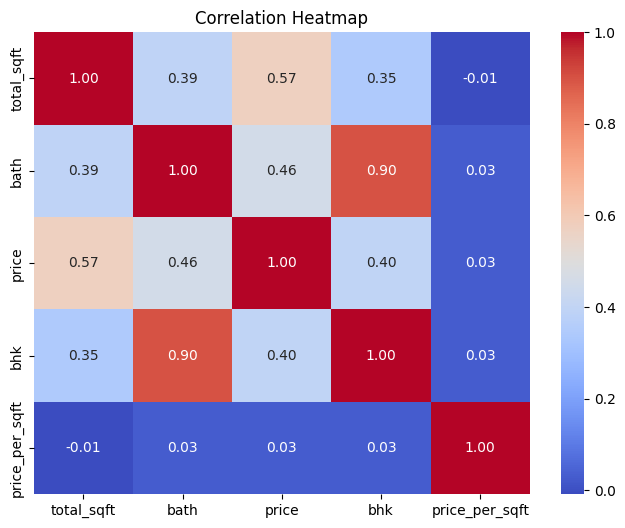

In [20]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


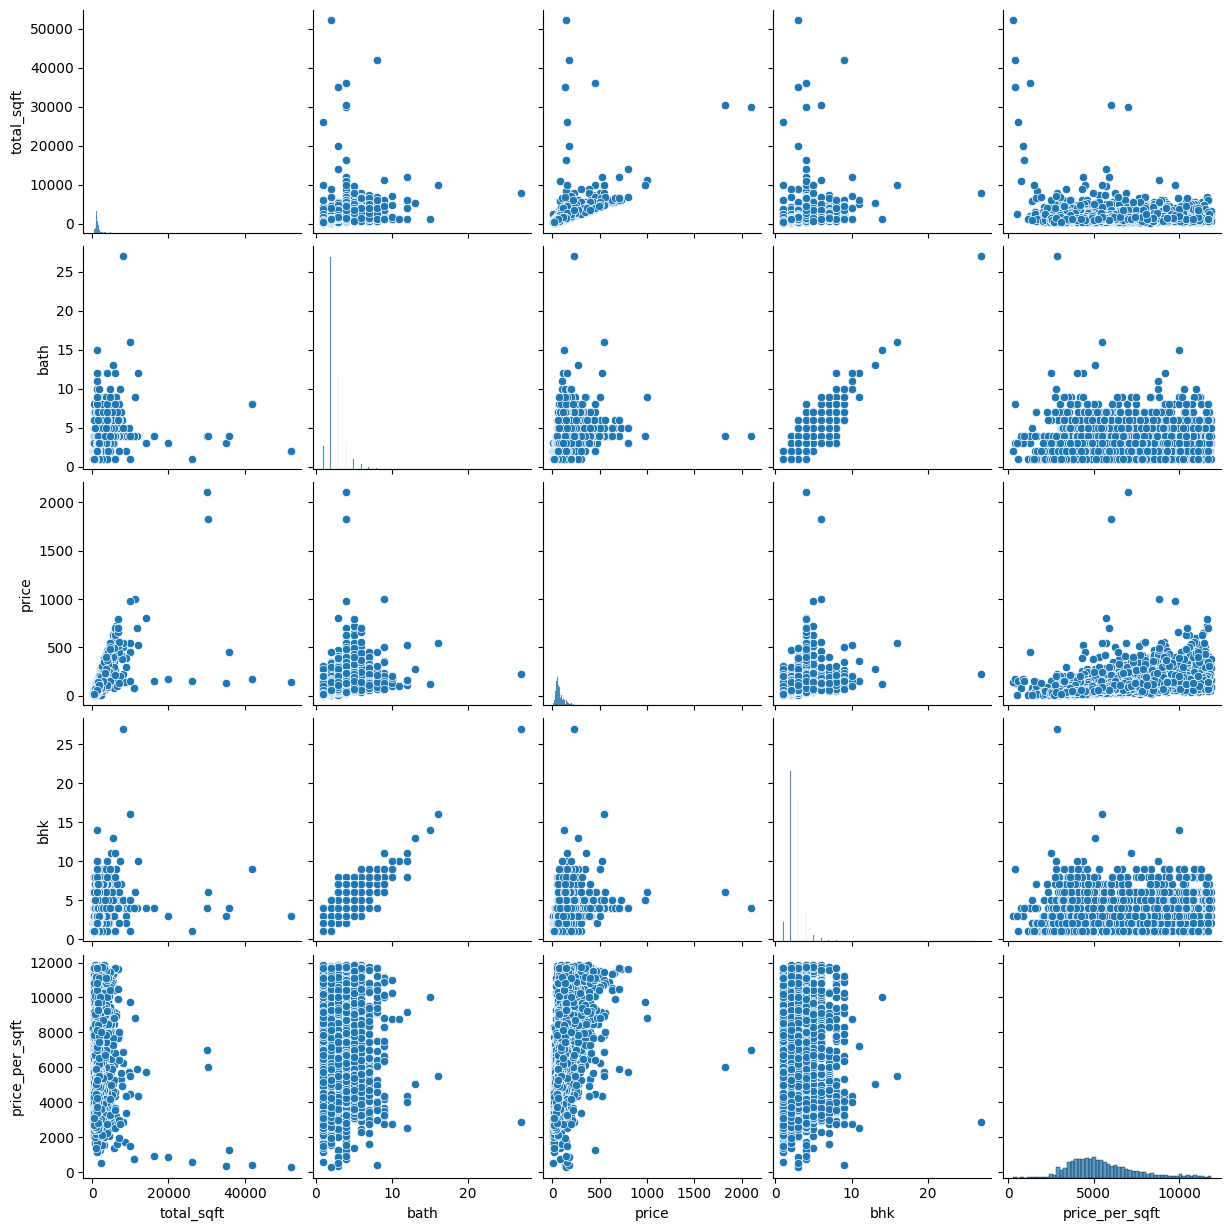

In [21]:
# Scatter Plot to check correlation
sns.pairplot(df_iqr)
plt.show()